In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('msft.csv')

In [3]:
df.head()


,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
Name                  5321 non-null object
Rating                5321 non-null float64
No of people Rated    5322 non-null int64
Category              5321 non-null object
Date                  5321 non-null object
Price                 5321 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


In [12]:
df.Category.isnull().value_counts()
df.Category.tail()

5317    Developer Tools
5318    Developer Tools
5319    Developer Tools
5320    Developer Tools
5321                NaN
Name: Category, dtype: object

In [20]:
df = df[:-1]
df.Rating.isnull().value_counts()

False    5317
Name: Rating, dtype: int64

In [26]:
category_enc = LabelEncoder()
category = category_enc.fit_transform(df['Category'])
df['Category']=category
df.Category.value_counts()

9     753
0     707
1     679
5     527
2     496
7     492
11    483
6     345
12    328
3     166
10    154
8     117
4      70
Name: Category, dtype: int64

In [46]:
price_enc = LabelEncoder()
price=price_enc.fit_transform(df['Price'])
df['Price']=price
df.Price.value_counts()

0     5163
21      53
30      14
32      10
7        9
14       8
12       5
20       4
1        4
38       4
36       4
13       3
5        3
42       3
34       2
8        1
40       1
25       1
28       1
24       1
9        1
16       1
17       1
4        1
39       1
29       1
33       1
31       1
27       1
23       1
19       1
15       1
11       1
3        1
26       1
22       1
18       1
10       1
6        1
2        1
35       1
37       1
41       1
Name: Price, dtype: int64

In [63]:
X = df[['Rating', 'Category','Price']]

In [64]:
from sklearn.cluster import KMeans

In [65]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
model.inertia_

96059.67761229997

In [67]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)
print("WCSS",wcss)

WCSS [174696.1128455896, 96059.67761229997, 32200.39731413364, 19482.06512465907, 13555.12000545741, 11063.865380997866, 9659.4507190604, 8330.544199302854, 7569.741338252134, 6474.106898425605]


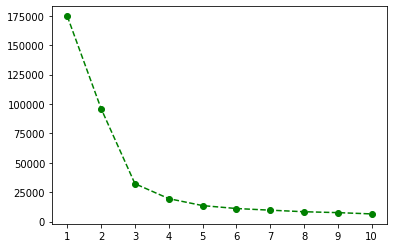

In [68]:
x = range(1,11)
y = wcss.copy()
plt.plot(x,y,'g--o')
plt.xticks(x)
plt.show()

In [69]:
# 3 is the optimal number of clusters
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
category_pred=model.predict(X)

In [71]:
df['pred']=category_pred

In [72]:
import plotly.express as px

In [74]:
fig = px.scatter_3d(df,x='Rating',y='Category',z='Price',color='pred')
fig.show()

In [76]:
df.Name

0                                          Dynamic Reader
1       Chemistry, Organic Chemistry and Biochemistry-...
2                                              BookViewer
3                                      Brick Instructions
4       Introduction to Python Programming by GoLearni...
                              ...                        
5312                     Assets Resizer for Windows Store
5313                                            WWWmaster
5314                                           HexToolkit
5315                           Visual Studio Image Scaler
5316                                            Get Color
Name: Name, Length: 5317, dtype: object

In [81]:
df['Name'].

TypeError: 'RangeIndex' object is not callable

TypeError: 'numpy.ndarray' object is not callable